In [2]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

In [3]:
!wget -O cell_samples.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv

--2020-07-07 21:14:29--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20675 (20K) [text/csv]
Saving to: ‘cell_samples.csv’

cell_samples.csv    100%[===================>]  20.19K  86.2KB/s    in 0.2s    

2020-07-07 21:14:30 (86.2 KB/s) - ‘cell_samples.csv’ saved [20675/20675]



In [24]:
data=pd.read_csv("cell_samples.csv")
#data[["class"]].values()

data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


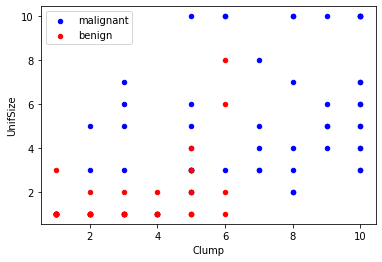

In [21]:
ax=data[data["Class"]==4][0:50].plot(kind="scatter",x="Clump",y="UnifSize",color="blue",label="malignant")
data[data["Class"]==2][0:50].plot(kind="scatter",x="Clump",y="UnifSize",color="red",label="benign",ax=ax)
plt.show()

In [23]:
data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [32]:
data=data[pd.to_numeric(data["BareNuc"],errors="coerce").notnull()]
data["BareNuc"]=data["BareNuc"].astype("int")
data.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [41]:
X=data[["Clump","UnifShape","MargAdh","SingEpiSize","BareNuc","BlandChrom","NormNucl","Mit"]]
X.head()

,Clump,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,2,1,3,1,1
1,5,4,5,7,10,3,2,1
2,3,1,1,2,2,3,1,1
3,6,8,1,3,4,3,7,1
4,4,1,3,2,1,3,1,1


In [42]:
y=np.asarray(data["Class"])
y[0:5]

array([2, 2, 2, 2, 2])

In [40]:
from sklearn.model_selection import train_test_split

In [48]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=4)
train_y.shape

(546,)

In [64]:
from sklearn import svm
clf=svm.SVC(kernel="poly")
clf.fit(train_X,train_y)

SVC(kernel='poly')

In [65]:
yhat=clf.predict(test_X)
yhat[0:5]

array([2, 4, 2, 4, 2])

In [66]:
from sklearn.metrics import f1_score
f1_score(test_y,yhat,average="weighted")

0.9639038982104676